Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])


In [5]:
# Handle missing values (if any)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())


In [6]:
# Assuming 'Churn' is the target variable, and 'customerID' is excluded from features
X = df.drop(["Churn", "customerID"], axis=1)  # Exclude non-numeric columns
y = df["Churn"]  # Target variable

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [9]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [12]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.7253371185237757
Confusion Matrix:
[[833 203]
 [184 189]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.48      0.51      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409



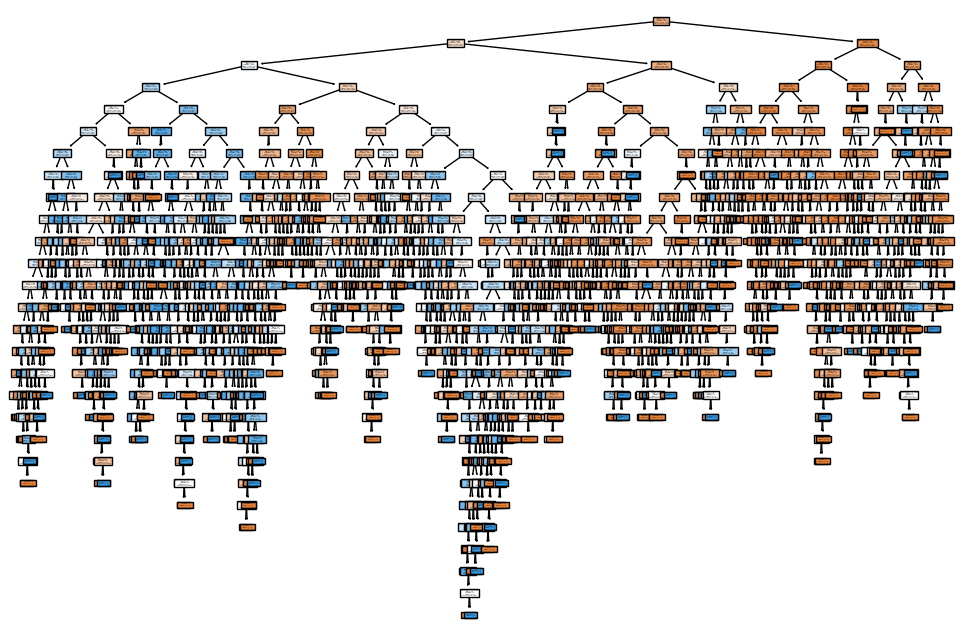

In [16]:
# Visualize the decision tree (optional)
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Churned', 'Churned'], filled=True)
plt.show()